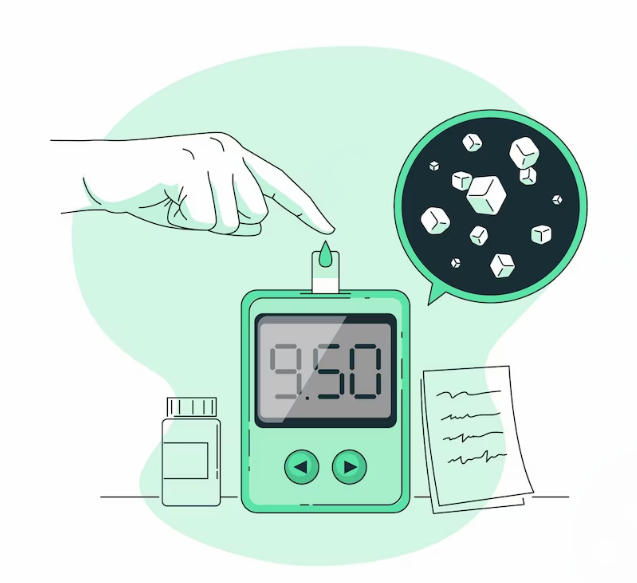

## 🔵 Quick look to the data <a id="introduction"></a>

<div class="alert alert-block alert-info">
        <p> 🟣 This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases in the USA. The purpose of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. In this dataset our target variable is "Outcome".  </p>
</div>

## 🔵 Data Exploration <a id="subparagraph1"></a>
 ***Pregnancies:*** Number of times pregnant

 ***Glucose:***  Plasma glucose concentration a 2 hours in an oral glucose tolerance test.

This is a lab test to check how your body handles the sugar. Normal person (2 hr after glucose test) should have less than 140mg/dl

 ***Blood Pressure:***  Diastolic blood pressure (mm Hg).

Normal values are less than 80.
Stage 1 hypertension: 80-89
Stage 2 hypertension: 90 or more
Hypertensive crisis: 120 or more

***Skin Thickness:*** Triceps skin fold thickness (mm)

For adults the normal values are 2.5 mm for men; 18 mm for women

***Insulin:*** 2-Hour serum insulin (mu U/ml). Insulin is a hormone that helps move blood sugar.

150 mu U/ml is a critical number, in which most people with type 1 or 2 needs insulin theraphy

***BMI:*** Body mass index (weight in kg/(height in m)^2): Assess if a person is overweight or underweight.

Underweight: less than 18.5
Normal weight: 18.5 - 24.9
Overweight: 25-29.9
Obese: over 30.0

***Diabetes pedigree function:*** Provides some information on the history in relatives. This is a measure of genetic influence.

***Age (years)***

***Target variable:*** Outcome 1 indicates having diabetes; 0 indicates not having diabetes.
https://github.com/fonnesbeck/Bios8366/blob/master/data/pima-indians-diabetes.metadata.txt

https://medium.com/analytics-vidhya/analyzing-pima-indian-diabetes-dataset-36d02a8a10e5

In [ ]:
import numpy as np
import pandas as pd

#For Visualization
import seaborn as sns
from matplotlib import pyplot as plt

import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
# !pip install missingno
import missingno as msno

#For ML
from datetime import date
from sklearn.model_selection import train_test_split,cross_validate,GridSearchCV
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import RobustScaler,LabelEncoder
from sklearn.metrics import accuracy_score,confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

#For Warnings
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df_ = pd.read_csv("/kaggle/input/pima-indians-diabetes-database/diabetes.csv")
df = df_.copy()

## 🔵 EDA

In [ ]:
def check_df(dataframe, head=10):
    print('\033[1m' + 10*"*" + ' SHAPE ' + 10*"*" + '\033[0m')
    print(f"Rows:{dataframe.shape[0]}")
    print(f"Columns:{dataframe.shape[1]}")
    print('\033[1m' + 10*"*" + ' TYPES ' + 10*"*" + '\033[0m')
    print(dataframe.dtypes)
    print('\033[1m' + 10*"*" + ' NUNIQUE ELEMENTS ' + 10*"*" + '\033[0m')
    print(dataframe.nunique())
    print('\033[1m' + 10*"*" + ' NA ' + 10*"*" + '\033[0m')
    print(dataframe.isnull().sum())
    print('\033[1m' + 10*"*" + ' DESCRIBE ' + 10*"*" + '\033[0m')
    print(dataframe.describe().T)
    print('\033[1m' + 10*"*" + ' DUPLICATED VALUE ' + 10*"*" + '\033[0m')
    print(dataframe.duplicated().sum())
    print('\033[1m' + 10*"*" + ' HEAD ' + 10*"*" + '\033[0m')
    print(dataframe.head(head))
    
check_df(df,10)

In [ ]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    
    """
    It gives the names of categorical, numerical and categorical but cardinal variables in the data set.
    Note: Categorical variables with numerical appearance are also included in categorical variables.

    Parameters
    ------
            df: Dataframe
                The dataframe from which variable names are to be retrieved
        cat_th: int, optional
                threshold value for numeric but categorical variables
        car_th: int, optinal
                threshold value for categorical but cardinal variables

    Returns
    ------
        cat_cols: list
                Categorical variable list
        num_cols: list
                Numeric variable list
        cat_but_car: list
                Categorical but cardinal variable list

    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        num_but_cat is inside cat_cols
   """
    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car


cat_cols, num_cols, cat_but_car = grab_col_names(df)

In [ ]:
cat_cols

In [ ]:
num_cols

In [ ]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('target')
ax[0].set_ylabel('')
sns.countplot('Outcome',data=df,ax=ax[1])
ax[1].set_title('Outcome')
plt.show()

In [ ]:
def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n")
    print("###################################")


for col in num_cols:
    target_summary_with_num(df, "Outcome", col)

In [ ]:
columns = df.columns
columns = list(columns)
columns.pop()
# Graphs to be plotted with these colors
colours = ['b', 'c', 'g', 'k', 'm', 'r', 'y', 'b']
sns.set(rc={'figure.figsize': (15, 17)})
colors_list = ['#BBF90F', '#06C2AC']
j = 1
sns.set_style(style='white')

for i in (columns):
    plt.subplot(4, 2, j)

    sns.violinplot(x="Outcome", y=i, data=df, kind="violin", split=True, height=4, aspect=.7, palette=colors_list)

    sns.swarmplot(x='Outcome', y=i, data=df, color="k", alpha=0.8)

    j = j + 1

## 🔵 Missing Values

<span style="font-size:14px; color:blue">

In [ ]:
#I define a function to give me a sort summary for missing values ratio
def missing_values_table(dataframe, na_name=False):
    na_columns = [col for col in dataframe.columns if dataframe[col].isnull().sum() > 0]

    n_miss = dataframe[na_columns].isnull().sum().sort_values(ascending=False)
    ratio = (dataframe[na_columns].isnull().sum() / dataframe.shape[0] * 100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss, np.round(ratio, 2)], axis=1, keys=['n_miss', 'ratio'])
    print(missing_df, end="\n")

    if na_name:
        return na_columns
    
missing_values_table(df)

<div class="alert alert-block alert-info">
        <p> 🟣 At first, dataset  has no missing values but when I examine closely I saw that that some values should not be 0 (Glucose, Insuli,Blood Pressure etc.). Therefore I will fill these feauture's values 0 to  NaN.  </p>
</div>

In [ ]:
missing_value = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
df[missing_value].head()

In [ ]:
df[missing_value] = np.where(df[missing_value] == 0, np.nan, df[missing_value])
missing_values_table(df)
msno.bar(df, color="#C79FEF", sort="ascending", figsize=(10,5), fontsize=12)
plt.show()

In [ ]:
msno.matrix(df,figsize=(10,5), fontsize=12, color=(1, 0.38, 0.27))
plt.show()

In [ ]:
#I saw that insulin and BMI has the highest correlation in terms of an observation.
msno.heatmap(df,cmap ="YlGnBu",figsize=(10,5), fontsize=12)
plt.show()

In [ ]:
#I wonder that how is the ratio between the missing values and target feauture. I write a fuction that can be used for this purpose.
def missing_vs_target(dataframe, target, na_columns):
    temp_df = dataframe.copy()

    for col in na_columns:
        temp_df[col + '_NA_FLAG'] = np.where(temp_df[col].isnull(), 1, 0)

    na_flags = temp_df.loc[:, temp_df.columns.str.contains("_NA_")].columns

    for col in na_flags:
        print(pd.DataFrame({"TARGET_MEAN": temp_df.groupby(col)[target].mean(),
                            "Count": temp_df.groupby(col)[target].count()}), end="\n\n\n")
na_cols = missing_values_table(df, True)


missing_vs_target(df, "Outcome", na_cols)

<div class="alert alert-block alert-info" role="alert">
  <p>🟣 BMI values documented that below source the level of 12, previously thought to mark the limit of human adaptation to starvation so with this information BMI lower than 12 will also be NaN.</p>
  <hr>
  <p class="mb-0">Source: The Biology of Human Starvation: Henry. CJK (2001) British Nutrition Foundation Nutrition Bulletin Vol 26, pp 205-211
          </p>
    </div>
<div class="alert alert-block alert-info" role="alert">
     <p>🟣 Same issue applied for Blood Pressure also if the value is 90/60mmHg or less than that is considered the lowest blood pressure before death</p>
     </div>


In [ ]:
# I convert these feautres also to 0 that I mentioned above.
df.loc[df["BloodPressure"]<60, "BloodPressure"].count()  #121
df.loc[df["BloodPressure"]<60, "BloodPressure"] = 0

df[df["BMI"]<12]['BMI'].count() #11
df.loc[df["BMI"]<12,"BMI"] = 0

In [ ]:
# If I have "Age" column, I can think categorization with that age column. Like grouping with 10 years apart.
df["age_bins"] = pd.cut(x=df["Age"],bins = [20,30,40,50,60,70,80,90])

df = df.fillna(df.groupby(['age_bins', 'Outcome', 'Pregnancies']).transform('median'))
missing_values_table(df)

In [ ]:
#I checked with missing_values_table() function so I  stil have missing values so I narrowed down to fill these values.
df = df.fillna(df.groupby(['age_bins', 'Outcome']).transform('median'))
missing_values_table(df)

In [ ]:
#I filled all missing values.
df = df.fillna(df.groupby( 'Outcome').transform('median'))
missing_values_table(df)

## 🔵 Outlier Analysis

In [ ]:
# This function's job is to determine the threshols of outlier values.
# I chose the quantile values as 0.5 and 0.95.
def outlier_thresholds(dataframe, col_name, q1=0.5, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

# This function job's is if I have outlier it returns True
def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

for col in num_cols:
    print(col, check_outlier(df, col))

In [ ]:
fig=make_subplots(rows=3,cols=2,subplot_titles=('<i>BloodPressure', '<i>SkinThickness', '<i>Insulin', '<i>DiabetesPedigreeFunction', '<i>BMI', '<i>Pregnancies'))
fig.add_trace(go.Box(x=df['BloodPressure'],name='BloodPressure'),row=1,col=1)
fig.add_trace(go.Box(x=df['SkinThickness'],name='SkinThickness'),row=1,col=2)
fig.add_trace(go.Box(x=df['Insulin'],name='Insulin'),row=2,col=1)
fig.add_trace(go.Box(x=df['DiabetesPedigreeFunction'],name='DiabetesPedigreeFunction'),row=2,col=2)
fig.add_trace(go.Box(x=df['BMI'],name='BMI'),row=3,col=1)
fig.add_trace(go.Box(x=df['Pregnancies'],name='Pregnancies'),row=3,col=2)

fig.update_yaxes(visible=False, showticklabels=False)
fig.update_layout(height=600, width=1000, title_text='<b>Box Plots to Check Outliers', font_size=20)
fig.update_layout(template='plotly_dark', title_x=0.5, font_family='Courier New', showlegend=False)

In [ ]:
# This function's job is to change the outlier values to up and low limit value of outlier_thresholds() function.
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [ ]:
for col in num_cols:
    replace_with_thresholds(df, col)

In [ ]:
# I checked the df with check_outlier(). Now,I saw I don't have outlier values.
for col in num_cols:
    print(col, check_outlier(df, col))

In [ ]:
# Before the feature extraction I observed the correlation between all columns.
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True,cmap ="YlGnBu");

## 🔵 Creating New Feature

<div class="alert alert-block alert-info">
        <p> 
            🟣 Firstly, in the missing values part I created age_bins. Then I will continue the add. I will create some of the features based on correlation  </p>
    
</div>

In [ ]:
# Creatin with pregnancy
df.loc[(df['Pregnancies'] == 0), 'Preg_CAT']  = 'Never'
df.loc[(df['Pregnancies'] == 1), 'Preg_CAT']  = 'One Time'
df.loc[(df['Pregnancies'] > 1), 'Preg_CAT']   = 'Many Times'

In [ ]:
#Creating with Insulin 
df.loc[(df['Insulin'] < 120)  , 'Insulin_CAT'] ="normal"
df.loc[(df['Insulin'] >= 120) , 'Insulin_CAT'] ="not-normal"

In [ ]:
df.groupby("Insulin_CAT").agg({"Outcome": ["mean","count"]})

In [ ]:
df["Age_BMI_CAT"] = df["Age"] * df["BMI"]

## 🔵Feature Scaling

<div class="alert alert-block alert-info">
        <p> 
            🟣  To be remove the biasness of the feature, I will apply scaling. I will use RobustScaler() because this method is more robust to outliers.  </p>
    
</div>

In [ ]:
num_cols
rs = RobustScaler()
df[num_cols] = rs.fit_transform(df[num_cols])

## 🔵Encoding

<div class="alert alert-block alert-info" role="alert">
  <p> 🟣 I have to give to binary coding to model so this step sould be done. At first I have "Outcome" as categorial but I create other categorial features</p>
    </div>

In [ ]:
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe
binary_cols = [col for col in df.columns if df[col].dtype not in ["int64", "float64"] and df[col].nunique() == 2]
for col in binary_cols:
    label_encoder(df, col)

In [ ]:
def one_hot_encoder(dataframe, categorical_cols, drop_first=True):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe


ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() > 2]

df = one_hot_encoder(df, ohe_cols)

df.head()

## 🔵Modelling

<div class="alert alert-block alert-info" role="alert">
  <p>🟣 In this part I will try 3 different models (RandomForestClassifier, Logistic Regression, KNN)</p>
    </div>
    
<div class="alert alert-block alert-info" role="alert">
     <p>🟣 Logistic regression is a statistical method used to analyze the relationship between a categorical dependent variable and one or more independent variables. It estimates the probability of an event occurring by fitting data to a logistic function.</p>
     </div>
     <div class="alert alert-block alert-info" role="alert">
     <p>🟣KNN (K-Nearest Neighbors) is a supervised machine learning algorithm used for classification and regression. It predicts the class of a new data point by comparing it to the k closest points in the training dataset.</p>
     </div>
          <div class="alert alert-block alert-info" role="alert">
     <p>🟣RandomForestClassifier is a supervised machine learning model that uses an ensemble of decision trees to classify data.</p>
     </div>

In [ ]:
# RandomForestClassifier
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)


rf_model = RandomForestClassifier(random_state=46).fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
# Cross Validation
rf_model = RandomForestClassifier().fit(X_train, y_train)

cv_results = cross_validate(rf_model,
                            X, y,
                            cv=5,
                            scoring=["accuracy", "precision", "recall", "f1", "roc_auc"])

print("test_accuracy: ", cv_results['test_accuracy'].mean())
print("test_f1: ", cv_results['test_f1'].mean())
print("test_roc_auc: ", cv_results['test_roc_auc'].mean())

In [ ]:
def plot_importance(model, features, num=len(X)):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()

plot_importance(rf_model, X_train)

In [ ]:
#Logistic regression
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=17)



log_model = LogisticRegression().fit(X_train, y_train)

y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:, 1]

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
# I want see ROC-curve of Logistic Regression
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc_score(y_test,y_prob)

plt.plot([0,1],[0,1],'r--')
plt.plot(fpr, tpr, marker='.', label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

In [ ]:
#Cross Validation
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

log_model = LogisticRegression().fit(X, y)

cv_results = cross_validate(log_model,
                            X, y,
                            cv=5,
                            scoring=["accuracy", "precision", "recall", "f1", "roc_auc"])
print("test_accuracy: ", cv_results['test_accuracy'].mean())
print("test_f1: ", cv_results['test_f1'].mean())
print("test_roc_auc: ", cv_results['test_roc_auc'].mean())

In [ ]:
# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.get_params()
#'n_neighbors': 5

In [ ]:
knn_params = {"n_neighbors": range(2, 50)}
knn_gs_best = GridSearchCV(knn_model,
                           knn_params,
                           cv=5,
                           n_jobs=-1,
                           verbose=1).fit(X, y)

knn_gs_best.best_params_

In [ ]:
knn_final = knn_model.set_params(**knn_gs_best.best_params_).fit(X, y)

cv_results = cross_validate(knn_final,
                            X,
                            y,
                            cv=5,
                            scoring=["accuracy", "f1", "roc_auc"])
print("test_accuracy: ", cv_results['test_accuracy'].mean())
print("test_f1: ", cv_results['test_f1'].mean())
print("test_roc_auc: ", cv_results['test_roc_auc'].mean())

## 🔵Conclusion

<div class="alert alert-block alert-info" role="alert">
     <p>🟣 In this part I will tried 3 different models (RandomForestClassifier, Logistic Regression, KNN). I did for all of them 5-Fold Cross Validation.</p>
      </div>
<div class="alert alert-block alert-info" role="alert">
     <p>🟣 Logistic regression is a statistical method used to analyze the relationship between a categorical dependent variable and one or more independent variables. It estimates the probability of an event occurring by fitting data to a logistic function.</p>
    </div>
 <div class="alert alert-block alert-info" role="alert">
     <p>🟣 I will update this notebook when I learned new ML models.😎😉</p>
    </div>

#### If you liked this notebook, please do upvote😊😊

#### For more;

#### https://www.linkedin.com/in/salihagorgulu/

#### https://github.com/salihagorgulu